# Gamma-ray source catalogs with Gammapy

## Introduction

This notebook shows how to work with gamma-ray source catalogs using [gammapy.catalog](http://docs.gammapy.org/en/latest/catalog/index.html)

* Load GeV and TeV gamma-ray source catalogs
* Select a given source and plot it's spectral model and spectral points
* Select a subset of sources of interest
* Plot parameter distributions
* Plot a sky image with source position markers

You will mainly learn how to work with Astropy tables and how to make some plots to investigate the data.

References:

* [astropy.table](http://astropy.readthedocs.io/en/latest/table/index.html)
* [gammapy.catalog](http://docs.gammapy.org/en/latest/catalog/index.html)
* [gammapy.catalog.SourceCatalog3FGL](http://docs.gammapy.org/en/latest/api/gammapy.catalog.SourceCatalog3FGL.html) and [gammapy.catalog.SourceCatalogObject3FGL](http://docs.gammapy.org/en/latest/api/gammapy.catalog.SourceCatalogObject3FGL.html)
* [gammapy.catalog.SourceCatalogGammaCat](http://docs.gammapy.org/en/latest/api/gammapy.catalog.SourceCatalogGammaCat.html) and [gammapy.catalog.SourceCatalogObjectGammaCat](http://docs.gammapy.org/en/latest/api/gammapy.catalog.SourceCatalogObjectGammaCat.html)


## Setup

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
from pprint import pprint
import numpy as np
import astropy.units as u

In [2]:
import gammapy
print(gammapy.__version__)

0.6.dev4117


## Access catalogs and sources

### gamma-cat

In [1]:
from gammapy.catalog import SourceCatalogGammaCat
gammacat = SourceCatalogGammaCat()
gammacat_source = gammacat['Vela Junior']

In [2]:
type(gammacat)

gammapy.catalog.gammacat.SourceCatalogGammaCat

In [3]:
type(gammacat.table)

astropy.table.table.QTable

In [4]:
type(gammacat_source)

gammapy.catalog.gammacat.SourceCatalogObjectGammaCat

In [5]:
type(gammacat_source.data)

collections.OrderedDict

In [23]:
# You can print the catalog table and source data if you like
# by uncommenting one of the following commands and executing the cell
# gammacat.table.show_in_browser(jsviewer=True)
# gammacat.table.info()
# gammacat.table.info('stats')
# pprint(gammacat_source.data)
# gammacat_source.pprint()

### Plot SED

Here's an example how to plot a TeV SED.

TODO: move content from this section and http://docs.gammapy.org/en/latest/spectrum/plotting_fermi_spectra.html to a separate notebook about SED access and plotting

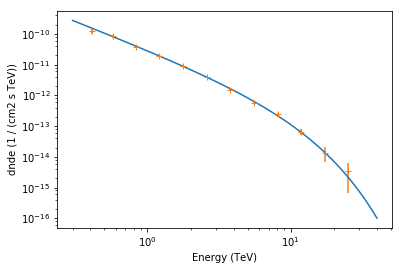

In [17]:
# gammacat_source.spectral_model.b
energy_range = [0.3, 40] * u.TeV
gammacat_source.spectral_model.plot(energy_range)
gammacat_source.flux_points.plot()

In [44]:
from gammapy.catalog import SourceCatalog3FGL
fermi_3fgl = SourceCatalog3FGL()
fermi_3fgl_source = fermi_3fgl['Crab']

In [45]:
type(fermi_3fgl)

gammapy.catalog.fermi.SourceCatalog3FGL

In [46]:
type(fermi_3fgl.table)

astropy.table.table.Table

In [47]:
type(fermi_3fgl_source)

gammapy.catalog.fermi.SourceCatalogObject3FGL

In [48]:
type(fermi_3fgl_source.data)

collections.OrderedDict

### Work in progress ...

The rest of this notebook is outdated, it needs to be re-written.

## Loading catalogs

The [gammapy.datasets](https://gammapy.readthedocs.org/en/latest/datasets/index.html)
module gives you quick access to the most important gamma-ray source catalogs
as [Astropy table objects](http://astropy.readthedocs.org/en/latest/table/index.html).

As you can see we store some parameters in the `meta` dict of the table that will
make it easier to label and color the plots we'll create below.

In [2]:
from gammapy import datasets
tevcat = datasets.load_tevcat()
tevcat.meta['name'] = 'TeVCat'
tevcat.meta['color'] = 'red'
#hesscat = datasets.load_hess_galactic_catalog()
hesscat = tevcat.copy()
hesscat.meta['name'] = 'HESS Galactic Catalog'
hesscat.meta['color'] = 'green'
fermicat = datasets.fetch_fermi_catalog('2FGL', 'LAT_Point_Source_Catalog')
fermicat.meta['name'] = '2FGL'
fermicat.meta['color'] = 'blue'

In [3]:
# Show the first three rows.
# In the IPython notebook this automatically gives an HTML table
tevcat[:3]

<Table rows=3 names=('canonical_name','catalog_id','catalog_id_name','catalog_name','coord_dec','coord_gal_lat','coord_gal_lon','coord_ra','coord_type','discoverer','discovery_date','distance_value','distance_type','distance_kpc','eth','flux','id','observatory_name','other_names','owner','size_x','size_y','source_type','source_type_name','spec_idx','src_rank','variability') units=(None,None,None,None,'deg','deg','deg','deg',None,None,None,None,None,'kpc','TeV',None,None,None,None,None,'deg','deg',None,None,None,None,None)>
array([ ('PKS 2005-489', '1', 'Default Catalog', 'TeV J2009-488', -48.83111111111111, -32.6051101920264, 350.374122051594, 302.36249999999995, -99, 6, '2005-06-01', 0.071, 'z', 323761.88688950095, 400.0, 0.03, 100, 'H.E.S.S.', 'HESS J2009-488', -99, nan, nan, 1, 'HBL', 3.2, 1, -99),
       ('H 2356-309', '1', 'Default Catalog', 'TeV J2359-306', -30.622972222222224, -78.0419383343485, 12.8562912921689, 359.78925, -99, 6, '2006-04-01', 0.165, 'z', 800886.9914584757, 100.0, 0.02, 101, 'H.E.S.S.', '1H 2354-315, HESS J2359-306', -99, nan, nan, 1, 'HBL', 3.09, 1, -99),
       ('PG 1553+113', '1', 'Default Catalog', 'TeV J1555+111', 11.194722222222222, 43.9602370458084, 21.9189101954641, 238.93624999999997, -99, 6, '2006-03-01', 0.5, 'z', 2874104.135406067, 300.0, 0.034, 102, 'H.E.S.S.', '1ES 1553+113,  HESS J1555+111', -99, nan, nan, 1, 'HBL', 4.5, 1, -99)], 
      dtype=[('canonical_name', '<U21'), ('catalog_id', '<U4'), ('catalog_id_name', '<U68'), ('catalog_name', '<U14'), ('coord_dec', '>f8'), ('coord_gal_lat', '>f8'), ('coord_gal_lon', '>f8'), ('coord_ra', '>f8'), ('coord_type', '>i8'), ('discoverer', '>i8'), ('discovery_date', '<U40'), ('distance_value', '>f8'), ('distance_type', '<U12'), ('distance_kpc', '>f8'), ('eth', '>f8'), ('flux', '>f8'), ('id', '>i8'), ('observatory_name', '<U15'), ('other_names', '<U512'), ('owner', '>i8'), ('size_x', '>f8'), ('size_y', '>f8'), ('source_type', '>i8'), ('source_type_name', '<U20'), ('spec_idx', '>f8'), ('src_rank', '>i8'), ('variability', '>i8')])

In [4]:
hesscat[:3]

<Table rows=3 names=('canonical_name','catalog_id','catalog_id_name','catalog_name','coord_dec','coord_gal_lat','coord_gal_lon','coord_ra','coord_type','discoverer','discovery_date','distance_value','distance_type','distance_kpc','eth','flux','id','observatory_name','other_names','owner','size_x','size_y','source_type','source_type_name','spec_idx','src_rank','variability') units=(None,None,None,None,'deg','deg','deg','deg',None,None,None,None,None,'kpc','TeV',None,None,None,None,None,'deg','deg',None,None,None,None,None)>
array([ ('PKS 2005-489', '1', 'Default Catalog', 'TeV J2009-488', -48.83111111111111, -32.6051101920264, 350.374122051594, 302.36249999999995, -99, 6, '2005-06-01', 0.071, 'z', 323761.88688950095, 400.0, 0.03, 100, 'H.E.S.S.', 'HESS J2009-488', -99, nan, nan, 1, 'HBL', 3.2, 1, -99),
       ('H 2356-309', '1', 'Default Catalog', 'TeV J2359-306', -30.622972222222224, -78.0419383343485, 12.8562912921689, 359.78925, -99, 6, '2006-04-01', 0.165, 'z', 800886.9914584757, 100.0, 0.02, 101, 'H.E.S.S.', '1H 2354-315, HESS J2359-306', -99, nan, nan, 1, 'HBL', 3.09, 1, -99),
       ('PG 1553+113', '1', 'Default Catalog', 'TeV J1555+111', 11.194722222222222, 43.9602370458084, 21.9189101954641, 238.93624999999997, -99, 6, '2006-03-01', 0.5, 'z', 2874104.135406067, 300.0, 0.034, 102, 'H.E.S.S.', '1ES 1553+113,  HESS J1555+111', -99, nan, nan, 1, 'HBL', 4.5, 1, -99)], 
      dtype=[('canonical_name', '<U21'), ('catalog_id', '<U4'), ('catalog_id_name', '<U68'), ('catalog_name', '<U14'), ('coord_dec', '>f8'), ('coord_gal_lat', '>f8'), ('coord_gal_lon', '>f8'), ('coord_ra', '>f8'), ('coord_type', '>i8'), ('discoverer', '>i8'), ('discovery_date', '<U40'), ('distance_value', '>f8'), ('distance_type', '<U12'), ('distance_kpc', '>f8'), ('eth', '>f8'), ('flux', '>f8'), ('id', '>i8'), ('observatory_name', '<U15'), ('other_names', '<U512'), ('owner', '>i8'), ('size_x', '>f8'), ('size_y', '>f8'), ('source_type', '>i8'), ('source_type_name', '<U20'), ('spec_idx', '>f8'), ('src_rank', '>i8'), ('variability', '>i8')])

In [5]:
# Show the first 8 columns and 3 rows
fermicat[fermicat.colnames[:8]][:3]

<Table rows=3 names=('Source_Name','RAJ2000','DEJ2000','GLON','GLAT','Conf_68_SemiMajor','Conf_68_SemiMinor','Conf_68_PosAng')>
array([ ('2FGL J0000.9-0748 ', 0.23371103405952454, -7.815497875213623, 88.82917785644531, -67.28050231933594, 0.12042465806007385, 0.10303960740566254, 47.849998474121094),
       ('2FGL J0001.7-4159 ', 0.4388492703437805, -41.99647903442383, 334.0755920410156, -71.99669647216797, 0.07536407560110092, 0.07061527669429779, 62.0099983215332),
       ('2FGL J0002.7+6220 ', 0.6798120141029358, 62.33962631225586, 117.31168365478516, 0.0007522919913753867, 0.05743847414851189, 0.05503685772418976, 8.600000381469727)], 
      dtype=[('Source_Name', '<U18'), ('RAJ2000', '>f4'), ('DEJ2000', '>f4'), ('GLON', '>f4'), ('GLAT', '>f4'), ('Conf_68_SemiMajor', '>f4'), ('Conf_68_SemiMinor', '>f4'), ('Conf_68_PosAng', '>f4')])

## Select a subset of sources of interest

Let's say we're interested only interested in sources in the inner Galaxy,
namely the box `|GLON| < 30 deg` and `|GLAT| < 5 deg` ... here's how you make this selection.

Working with many catalogs is often a bit tedious because column names are different
(e.g. `GLON` and `coord_gal_lon`) or because of other data cleaning that's required
(like wrapping `GLON` to the range `(-180, 180]` here).

In [6]:
def select_sources(catalog):
    """Select sources of interest to us."""
    print('Number of sources before selection: {}'.format(len(catalog)))
    
    glon = catalog['GLON']
    glat = catalog['GLAT']
    
    glon_min, glon_max = -30, 30
    glat_min, glat_max = -5, 5

    mask = (glon_min < glon) & (glon < glon_max)
    mask &= (glat_min < glat) & (glat < glat_max)

    catalog = catalog[mask]
    print('Number of sources after selection:  {}'.format(len(catalog)))
    
    return catalog

In [7]:
tevcat['GLON'] = tevcat['coord_gal_lon']
tevcat['GLAT'] = tevcat['coord_gal_lat']
tevcat['GLON'] = np.where(tevcat['GLON'] > 180, tevcat['GLON'] - 360, tevcat['GLON'])
tevcat2 = select_sources(tevcat)

Number of sources before selection: 173
Number of sources after selection:  45


In [8]:
#hesscat['GLON'] = np.where(hesscat['GLON'] > 180, hesscat['GLON'] - 360, hesscat['GLON'])
#hesscat2 = select_sources(hesscat)

In [9]:
fermicat['GLON'] = np.where(fermicat['GLON'] > 180, fermicat['GLON'] - 360, fermicat['GLON'])
fermicat2 = select_sources(fermicat)

Number of sources before selection: 1873
Number of sources after selection:  126


## Plot parameter distributions

Let's plot the `GLON`, `GLAT` parameter distributions.

For the source flux distributions we make separate plots for `GeV` and `TeV` sources, because their fluxes aren't easily comparable.

In [10]:
catalogs = [fermicat2, tevcat2]

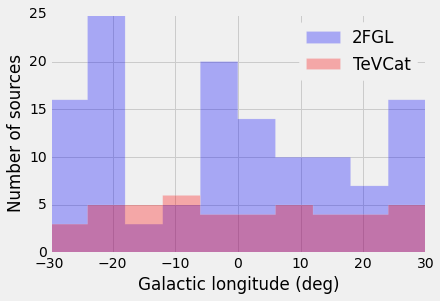

In [11]:
for catalog in catalogs:
    plt.hist(catalog['GLON'], bins=10, range=(-30, 30),
             label=catalog.meta['name'],
             color=catalog.meta['color'],
             alpha=0.3, histtype="stepfilled",)
plt.xlabel('Galactic longitude (deg)')
plt.ylabel('Number of sources')
plt.legend();

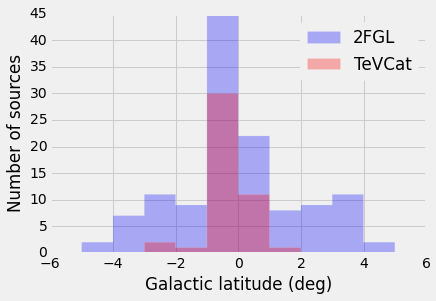

In [12]:
for catalog in catalogs:
    plt.hist(catalog['GLAT'], bins=10, range=(-5, 5),
             label=catalog.meta['name'],
             color=catalog.meta['color'],
             alpha=0.3, histtype="stepfilled",)
plt.xlabel('Galactic latitude (deg)')
plt.ylabel('Number of sources')
plt.legend();

45
33


/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


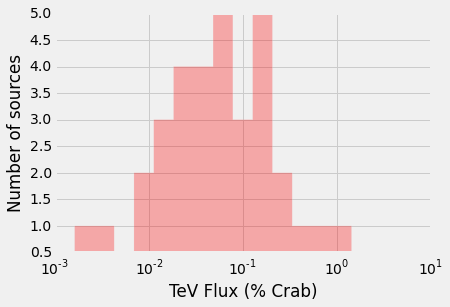

In [13]:
flux = tevcat2['flux']
print(len(flux))
# We need to remove sources with missing flux info (a `NaN` value)
# or matplotlib will not plot it
flux = flux[~np.isnan(flux)]
print(len(flux))
plt.hist(flux, bins=np.logspace(-3, 1, 20),
         color=tevcat2.meta['color'],
         alpha=0.3, histtype="stepfilled",)
plt.xlabel('TeV Flux (% Crab)')
plt.ylabel('Number of sources')
plt.semilogx()
plt.legend();

## Plot a sky image with source position markers

We use [APLPy](http://aplpy.github.io/) to plot an empty sky image showing the locations of the sources as markers.

This is a bit complicated because we don't have an image or WCS to instantiate the [aplpy.FITSFigure](http://aplpy.readthedocs.org/en/stable/api/aplpy.FITSFigure.html).
Here we'll use the [gammapy.image.make_empty_image](https://gammapy.readthedocs.org/en/latest/api/gammapy.image.make_empty_image.html) utility function to make an empty image to plot on.

In [14]:
from gammapy.image import make_empty_image
from aplpy import FITSFigure

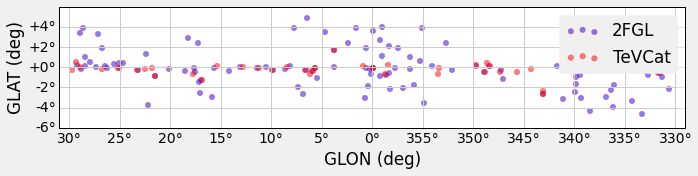

In [15]:
image = make_empty_image(nxpix=62, nypix=12, binsz=1)
figure = FITSFigure(image)
# This call to `show_grayscale` is a workaround to get the Figure stretch correct.
figure.show_grayscale(vmin=-1, vmax=0)
for catalog in catalogs:
    figure.show_markers(catalog['GLON'], catalog['GLAT'],
                        facecolor=catalog.meta['color'],
                        alpha=0.5,
                        label=catalog.meta['name'],
                        )
figure.ticks.set_xspacing(5)
figure.ticks.set_yspacing(2)
figure.tick_labels.set_xformat('dd')
figure.tick_labels.set_yformat('dd')
figure.axis_labels.set_xtext('GLON (deg)')
figure.axis_labels.set_ytext('GLAT (deg)')
plt.legend();

## Exercises

* Choose another source, e.g. "Crab" or "PKS 2155-304". Access it for the three catalogs ``3fgl``, ``3fhl`` and ``gamma-cat``, print the data on it, and make a plot showing the spectral model and spectral points from those catalogs (not necessarily in one plot, but you can try if you like).
* Make a list of sources in the 3FGL catalog within one degree of the Galactic center, and compute their distance to the Galactic center. Make a plot with source markers and names and separation as labels. Tip: use `gc = SkyCoord(0, 0, frame='galactic', unit='deg')` to get a ``SkyCoord`` object for the Galactic center location.